In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# URL for the NASA Exoplanet Archive TAP query (returns CSV).
NASA_API_URL = 'https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+pl_name,pl_rade,pl_insol,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,disc_year+from+pscomppars&format=csv'

In [4]:
data = pd.read_csv(NASA_API_URL)

In [5]:
data.head()

,pl_name,pl_rade,pl_insol,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,disc_year
0,Kepler-334 d,1.41,39.475,2.57,25.098490,0.1680,656.0,5828.0,1.068,2014
1,Kepler-251 d,2.77,17.477,8.10,30.133001,0.1820,536.0,5526.0,0.890,2014
2,Kepler-729 b,3.58,1089.549,12.50,3.166354,0.0432,1273.0,5633.0,0.910,2016
3,Kepler-687 b,3.52,15.648,12.20,20.505870,0.1326,518.0,4841.0,0.730,2016
4,Kepler-119 b,3.60,745.285,12.60,2.422082,0.0350,1213.0,5595.0,0.839,2014


In [6]:
data.describe()

,pl_rade,pl_insol,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,disc_year
count,5966.000000,4187.000000,5958.000000,5.685000e+03,5693.000000,4461.000000,5722.000000,5700.000000,5989.000000
mean,5.805433,423.997485,383.287117,7.525462e+04,15.542432,917.166655,5411.726015,1.512472,2016.761396
std,5.344241,1329.416478,1093.302666,5.334132e+06,352.929478,464.992155,1757.547834,3.968964,4.841441
min,0.309800,0.000300,0.020000,9.070629e-02,0.004400,34.000000,415.000000,0.011500,1992.000000
25%,1.820000,24.073500,4.122500,4.339465e+00,0.052300,572.000000,4918.000000,0.772000,2014.000000
50%,2.830000,99.240000,9.030000,1.109429e+01,0.101600,825.000000,5551.000000,0.952481,2016.000000
75%,11.976801,380.799500,181.162192,3.981899e+01,0.300700,1167.000000,5903.750000,1.250000,2021.000000
max,77.342100,44900.000000,9344.155166,4.020000e+08,19000.000000,4050.000000,57000.000000,88.475000,2025.000000


In [7]:
data.isna().sum()

pl_name          0
pl_rade         23
pl_insol      1802
pl_bmasse       31
pl_orbper      304
pl_orbsmax     296
pl_eqt        1528
st_teff        267
st_rad         289
disc_year        0
dtype: int64

In [8]:
data['pl_rade'].head()

0    1.41
1    2.77
2    3.58
3    3.52
4    3.60
Name: pl_rade, dtype: float64

Looking at some Visualizations

In [9]:
data[['pl_rade','pl_bmasse','pl_orbper','pl_orbsmax','pl_eqt','st_teff','st_rad']].corr()

,pl_rade,pl_bmasse,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad
pl_rade,1.000000,0.451167,0.019388,0.054947,0.438931,0.142620,0.208073
pl_bmasse,0.451167,1.000000,0.033056,0.173606,0.259295,0.067483,0.353238
pl_orbper,0.019388,0.033056,1.000000,0.996747,-0.014225,-0.016541,-0.003915
pl_orbsmax,0.054947,0.173606,0.996747,1.000000,0.065314,-0.018294,-0.007990
pl_eqt,0.438931,0.259295,-0.014225,0.065314,1.000000,0.424670,0.452159
st_teff,0.142620,0.067483,-0.016541,-0.018294,0.424670,1.000000,-0.048510
st_rad,0.208073,0.353238,-0.003915,-0.007990,0.452159,-0.048510,1.000000


<Axes: >

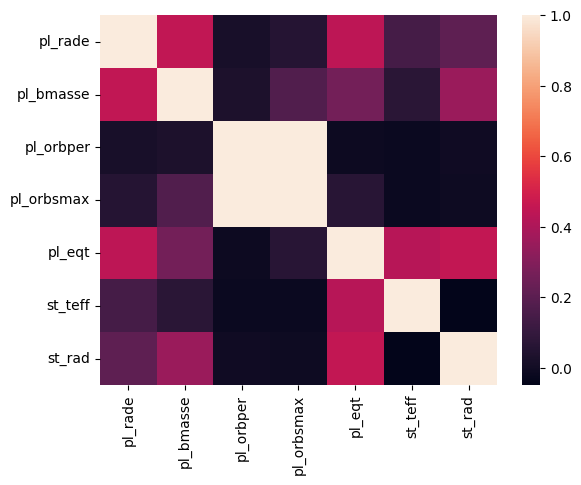

In [10]:
sns.heatmap(data[['pl_rade','pl_bmasse','pl_orbper','pl_orbsmax','pl_eqt','st_teff','st_rad']].corr(), annot=False)

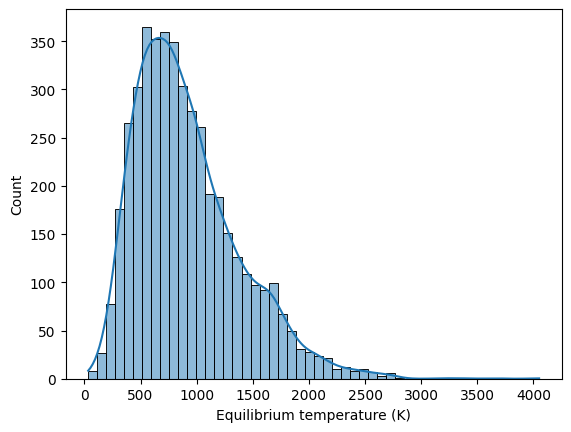

In [11]:
s = data['pl_eqt'].dropna()

sns.histplot(s, kde=True, bins=50)
plt.xlabel("Equilibrium temperature (K)")
plt.show()


Text(0.5, 0, 'pl_eqt (K)')

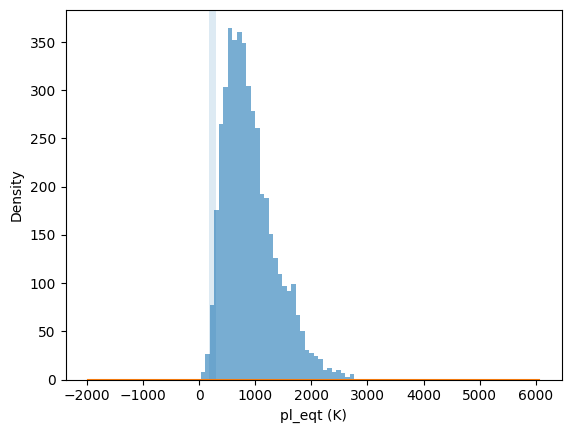

In [12]:
s = data['pl_eqt'].dropna()
ax = s.plot.hist(bins=50, alpha=.6); s.plot.kde(ax=ax)
ax.axvspan(180, 310, alpha=.15); ax.set_xlabel("pl_eqt (K)")


Text(0, 0.5, 'Mass')

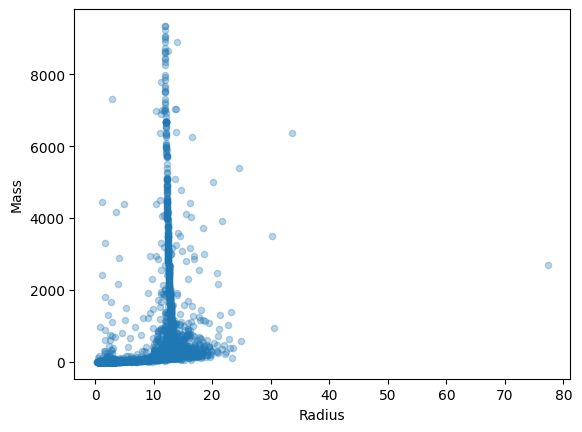

In [13]:
ax = data.plot.scatter(x='pl_rade', y='pl_bmasse', alpha=.3)
ax.scatter([1],[1], marker='x'); ax.set_xlabel('Radius'); ax.set_ylabel('Mass')


<h2>Potential habital zone</h2>
Define a simple label (proxy)
<h3>Size:</h3>0.5 ≤ pl_rade ≤ 1.8
<h3>Radiation (rather then temperature):</h3>Frel​=(st_rad)2(st_teff/5778)4/(pl_orbsmax)2
<h3>HZ-range (roughly):</h3> 0.35 ≤ F_rel ≤ 1.5.

In [14]:
data['hab'] = (data['pl_rade'].between(0.5,1.8) & data['pl_insol'].between(0.35,1.5)).astype(int)

In [15]:
data['hab'].value_counts(dropna=False)

hab
0    5955
1      34
Name: count, dtype: int64

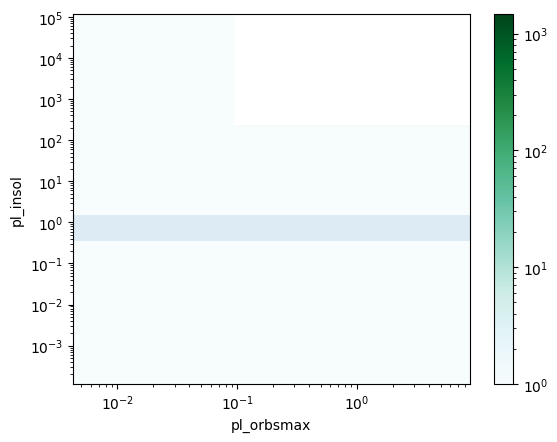

In [16]:
ax = data.plot.hexbin(x='pl_orbsmax', y='pl_insol', gridsize=60, bins='log', mincnt=1)
ax.set_xscale('log'); ax.set_yscale('log')
ax.axhspan(0.35, 1.5, alpha=0.12)

<Axes: xlabel='pl_rade', ylabel='pl_bmasse'>

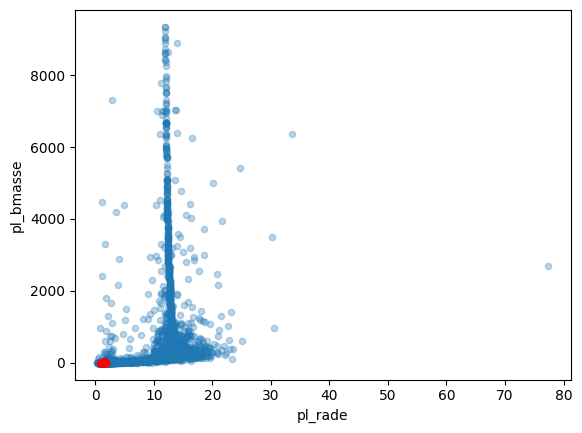

In [17]:
ax = data.plot.scatter(x='pl_rade', y='pl_bmasse', alpha=.3)
data[data.hab==1].plot.scatter(x='pl_rade', y='pl_bmasse', color='red', ax=ax)


In [18]:
data['hab'].value_counts()

hab
0    5955
1      34
Name: count, dtype: int64

In [19]:
flux_col = 'pl_insol' if 'pl_insol' in data.columns else 'F_rel'
need = ['pl_rade', flux_col]
ok = data[need].notna().all(1)

print("Rows with both inputs:", ok.sum(), "of", len(data))
print("hab=1 among rows with inputs:", int(data.loc[ok, 'hab'].sum()))
print("hab=1 total:", int(data['hab'].sum()))


Rows with both inputs: 4187 of 5989
hab=1 among rows with inputs: 34
hab=1 total: 34


In [20]:
hab_planets = data[data['hab'] == 1]